# Praca domowa 1
### Klaudia Gruszkowska

Praca domowa nr 1 z przedmiotu Warsztaty Badawcze XAI 2

In [1]:
options(warn=-1)

In [2]:
cleaned_housing <- read.csv("cleaned_housing.csv")
head(cleaned_housing)

NEAR.BAY,X.1H.OCEAN,INLAND,NEAR.OCEAN,ISLAND,longitude,latitude,housing_median_age,population,households,median_income,mean_bedrooms,mean_rooms,median_house_value
1,0,0,0,0,-1.327803,1.052523,0.9821189,-0.9744050,-0.9770092,2.34470896,-0.148510661,0.6285442,452600
1,0,0,0,0,-1.322812,1.043159,-0.6070042,0.8614180,1.6699206,2.33218146,-0.248535936,0.3270334,358500
1,0,0,0,0,-1.332794,1.038478,1.8561366,-0.8207575,-0.8436165,1.78265622,-0.052900657,1.1555925,352100
1,0,0,0,0,-1.337785,1.038478,1.8561366,-0.7660095,-0.7337637,0.93294491,-0.053646030,0.1569623,341300
1,0,0,0,0,-1.337785,1.038478,1.8561366,-0.7598283,-0.6291419,-0.01288068,-0.038194658,0.3447024,342200
1,0,0,0,0,-1.337785,1.038478,1.8561366,-0.8940491,-0.8017678,0.08744452,0.005232996,-0.2697231,269700


Korzystam z przykładowego modelu lasu losowego i wstępnego czyszczenia danych ze strony: https://www.kaggle.com/camnugent/introduction-to-machine-learning-in-r-tutorial. Zmienne kategoryczne zostały pezeskalowane i został przeprowadzony encoding.

In [36]:
suppressWarnings(library('randomForest'))

In [4]:
set.seed(1738)
sample = sample.int(n = nrow(cleaned_housing), size = floor(.8*nrow(cleaned_housing)), replace = F)
train = cleaned_housing[sample, ] #just the samples
test  = cleaned_housing[-sample, ] #everything but the samples

train_y = train[,'median_house_value']
train_x = train[, names(train) !='median_house_value']

In [5]:
rf_model = randomForest(train_x, y = train_y , ntree = 500, importance = TRUE)

### Zadanie 1. Dla wybranej obserwacji ze zbioru danych wylicz predykcję modelu.

In [6]:
y_pred = predict(rf_model, newdata = cleaned_housing[1,])
y_pred

1 
436465.3

Porównam ją teraz z rzeczywistą wartością dla tej obserwacji.

In [7]:
cleaned_housing[1,'median_house_value']

[1] 452600

### Zadanie 2. Dla wybranej obserwacji z punktu 1., wylicz dekompozycję predykcji modelu używając SHAP, Break Down lub obie (pakiety w R: DALEX, iml, pakiety w Python: shap, dalex, piBreakDown).

In [35]:
suppressMessages(library('DALEX'))
suppressMessages(library('DALEXtra'))

In [9]:
explainer <- explain(model = rf_model,
                     data = cleaned_housing[, names(cleaned_housing) !='median_house_value'],
                     y = cleaned_housing$median_house_value)

Preparation of a new explainer is initiated
  -> model label       :  randomForest  (  default  )
  -> data              :  20640  rows  13  cols 
  -> target variable   :  20640  values 
  -> predict function  :  yhat.randomForest  will be used (  default  )
  -> predicted values  :  No value for predict function target column. (  default  )
  -> model_info        :  package randomForest , ver. 4.6.14 , task regression (  default  ) 
  -> predicted values  :  numerical, min =  42853.44 , mean =  207027.3 , max =  499950.9  
  -> residual function :  difference between y and yhat (  default  )
  -> residuals         :  numerical, min =  -309146.7 , mean =  -171.4775 , max =  336505.5  
  A new explainer has been created!  


In [10]:
pp_ranger_bd <- predict_parts(explainer, new_observation = cleaned_housing[1,])
pp_ranger_bd

variable,contribution,variable_name,variable_value,cumulative,sign,position,label
intercept,2.070273e+05,intercept,1,207027.3,1,15,randomForest
median_income = 2.345,1.490283e+05,median_income,2.345,356055.6,1,14,randomForest
longitude = -1.328,2.629526e+04,longitude,-1.328,382350.8,1,13,randomForest
INLAND = 0,2.571427e+04,INLAND,0,408065.1,1,12,randomForest
mean_rooms = 0.6285,3.201723e+04,mean_rooms,0.6285,440082.3,1,11,randomForest
population = -0.9744,6.867111e+02,population,-0.9744,440769.1,1,10,randomForest
households = -0.977,7.661138e+02,households,-0.977,441535.2,1,9,randomForest
housing_median_age = 0.9821,1.001586e+04,housing_median_age,0.9821,451551.0,1,8,randomForest
NEAR.BAY = 1,-1.576455e+03,NEAR.BAY,1,449974.6,-1,7,randomForest
X.1H.OCEAN = 0,9.971903e+02,X.1H.OCEAN,0,450971.8,1,6,randomForest


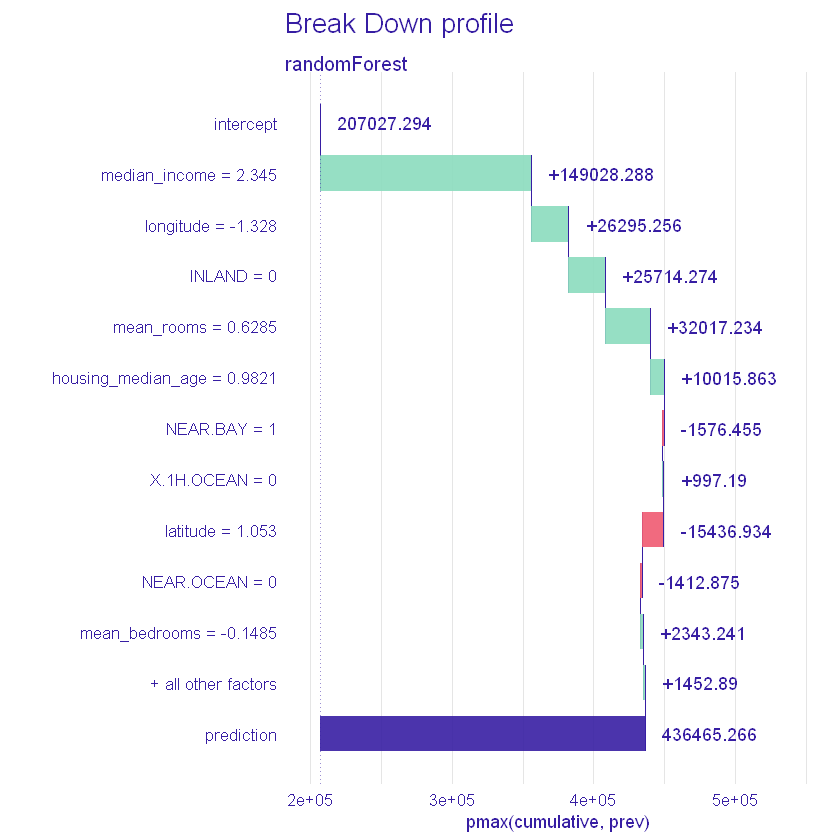

In [34]:
library(tidyverse)
suppressMessages(plot(pp_ranger_bd)+ylim(200000,550000))


In [38]:
pp_ranger_shap <- predict_parts(explainer, new_observation = cleaned_housing[1,], type = "shap", B = 10)

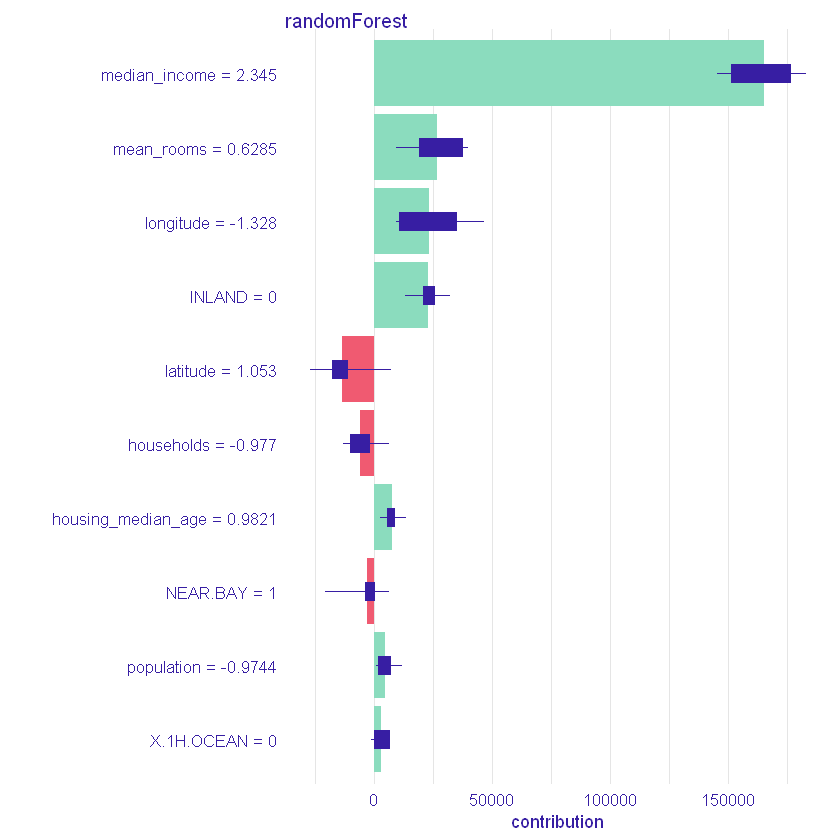

In [39]:
plot(pp_ranger_shap)

Cechy mające największy wpływ na predykcje modelu dla tej obserwacji to mean_income= 2.345 i mean_rooms= 0.6285, które oznaczają medianę dochodu na gospodarstwo domowe i średnia liczba pokoi, która to zmienna została stworzona jako (total_rooms/housing$households) całkowita liczba pokoi dzielona na liczbę gospodarstw domowych.

Duży wpływ tych cech jest zrozumiały ponieważ dzięki niemu możemy ustalić czy badany obszar jest np bogatą dzielnicą, a ilość pokoi może w pośredni sposób pokazać wielkosć domów. 

Oryginalne dane tej obserwacji:

In [3]:
h <- read.csv("housing.csv")
h[1,]

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY


### Zadanie 3. Wybierz dwie obserwacje ze zbioru danych, które mają inne najważniejsze zmienne (na przykład: dla obserwacji A ważne zmienne to wiek i płeć, a dla obserwacji B klasa i rasa).

In [15]:
pp_ranger_bd_2 <- predict_parts(explainer, new_observation = cleaned_housing[5,])
pp_ranger_bd_2

variable,contribution,variable_name,variable_value,cumulative,sign,position,label
intercept,2.070273e+05,intercept,1,207027.3,1,15,randomForest
longitude = -1.338,4.796625e+04,longitude,-1.338,254993.5,1,14,randomForest
INLAND = 0,2.103488e+04,INLAND,0,276028.4,1,13,randomForest
housing_median_age = 1.856,9.137338e+03,housing_median_age,1.856,285165.8,1,12,randomForest
population = -0.7598,1.254460e+04,population,-0.7598,297710.4,1,11,randomForest
households = -0.6291,-1.092412e+04,households,-0.6291,286786.2,-1,10,randomForest
mean_rooms = 0.3447,-1.209689e+03,mean_rooms,0.3447,285576.5,-1,9,randomForest
NEAR.BAY = 1,-5.924879e+03,NEAR.BAY,1,279651.7,-1,8,randomForest
X.1H.OCEAN = 0,-1.403957e+03,X.1H.OCEAN,0,278247.7,-1,7,randomForest
latitude = 1.038,-3.269404e+04,latitude,1.038,245553.7,-1,6,randomForest


Na wynik drugiej obserwacji największy wpływ miały cechy longitude= -1.338 i INLAND = 0. 

Patrząc na mapę możemy zrozumieć dlaczego akurat te cechy czyli cechy dotyczące lokalizacji miały najwiekszy dodatni wpływ na średnią wartość domu w tej okolicy.

Przykład obserwacji pierwszej i drugiej pokazuje, że dla różnych obserwacji, różne cechy miały różny poziom wpływu.

In [37]:
h[5,]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY


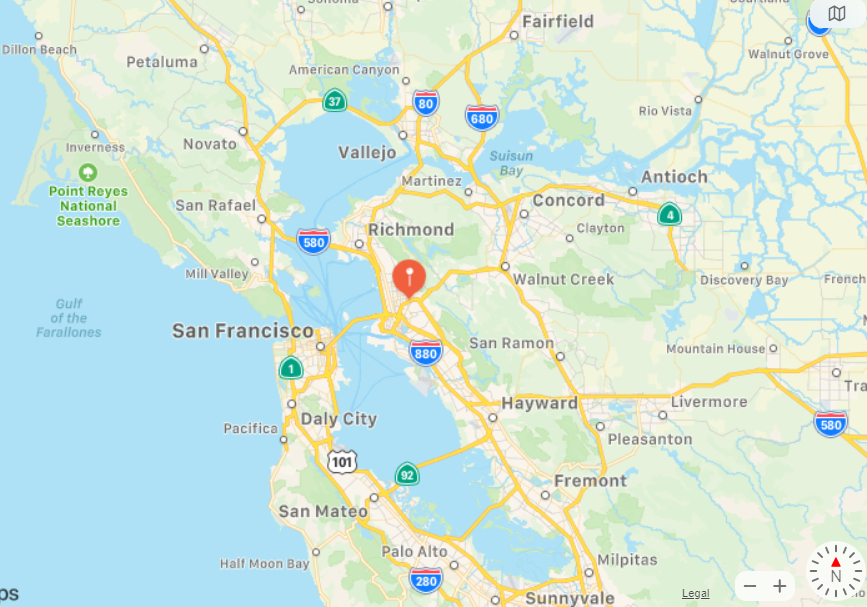

### Zadanie 4.  Znajdź dwie obserwacje ze zbioru danych, które mają dla tych samych zmiennych inne efekty (pozytywny i negatywny).

In [40]:
b <- dplyr::count(cleaned_housing, longitude, sort = TRUE)
c <- b[1,"longitude"]
a <- dplyr ::filter(cleaned_housing, longitude == c)
pp_ranger_bd_3 <- predict_parts(explainer, new_observation = a[1,])
pp_ranger_bd_3

variable,contribution,variable_name,variable_value,cumulative,sign,position,label
intercept,207027.294374,intercept,1,207027.3,1,15,randomForest
median_income = -0.8136,-42248.304044,median_income,-0.8136,164779.0,-1,14,randomForest
INLAND = 1,-25454.455031,INLAND,1,139324.5,-1,13,randomForest
mean_rooms = 0.5979,20768.804139,mean_rooms,0.5979,160093.3,1,12,randomForest
longitude = 0.6287,4993.543245,longitude,0.6287,165086.9,1,11,randomForest
mean_bedrooms = 0.6311,-11690.637206,mean_bedrooms,0.6311,153396.2,-1,10,randomForest
latitude = 0.6124,-32072.231893,latitude,0.6124,121324.0,-1,9,randomForest
population = -0.4985,-122.800990,population,-0.4985,121201.2,-1,8,randomForest
X.1H.OCEAN = 0,-12701.140597,X.1H.OCEAN,0,108500.1,-1,7,randomForest
households = -0.3362,-1789.178437,households,-0.3362,106710.9,-1,6,randomForest


In [41]:
pp_ranger_bd_4 <- predict_parts(explainer, new_observation = a[3,])
pp_ranger_bd_4

variable,contribution,variable_name,variable_value,cumulative,sign,position,label
intercept,207027.2944,intercept,1,207027.3,1,15,randomForest
median_income = 0.6547,37040.7991,median_income,0.6547,244068.1,1,14,randomForest
INLAND = 0,24462.8334,INLAND,0,268530.9,1,13,randomForest
latitude = -0.6329,14655.4650,latitude,-0.6329,283186.4,1,12,randomForest
longitude = 0.6287,-827.0117,longitude,0.6287,282359.4,-1,11,randomForest
households = 0.3491,17253.5226,households,0.3491,299612.9,1,10,randomForest
X.1H.OCEAN = 1,-4734.8732,X.1H.OCEAN,1,294878.0,-1,9,randomForest
mean_rooms = -0.114,-10766.8584,mean_rooms,-0.114,284111.2,-1,8,randomForest
population = 0.3395,-18448.8769,population,0.3395,265662.3,-1,7,randomForest
housing_median_age = 0.4259,-7105.9307,housing_median_age,0.4259,258556.4,-1,6,randomForest


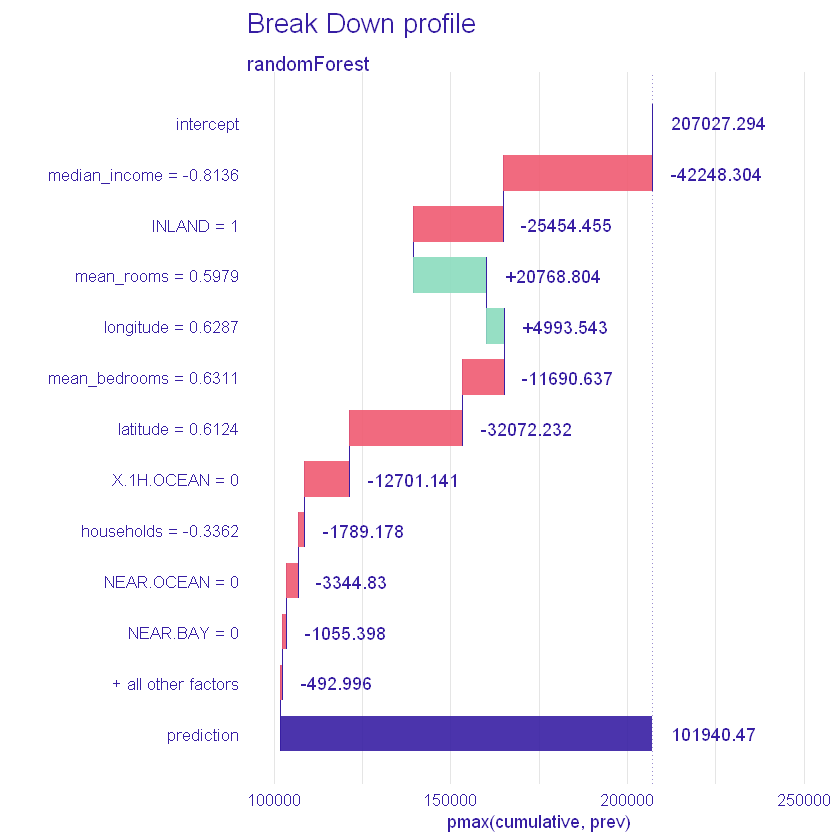

In [43]:
suppressMessages(plot(pp_ranger_bd_3)+ylim(100000,250000))

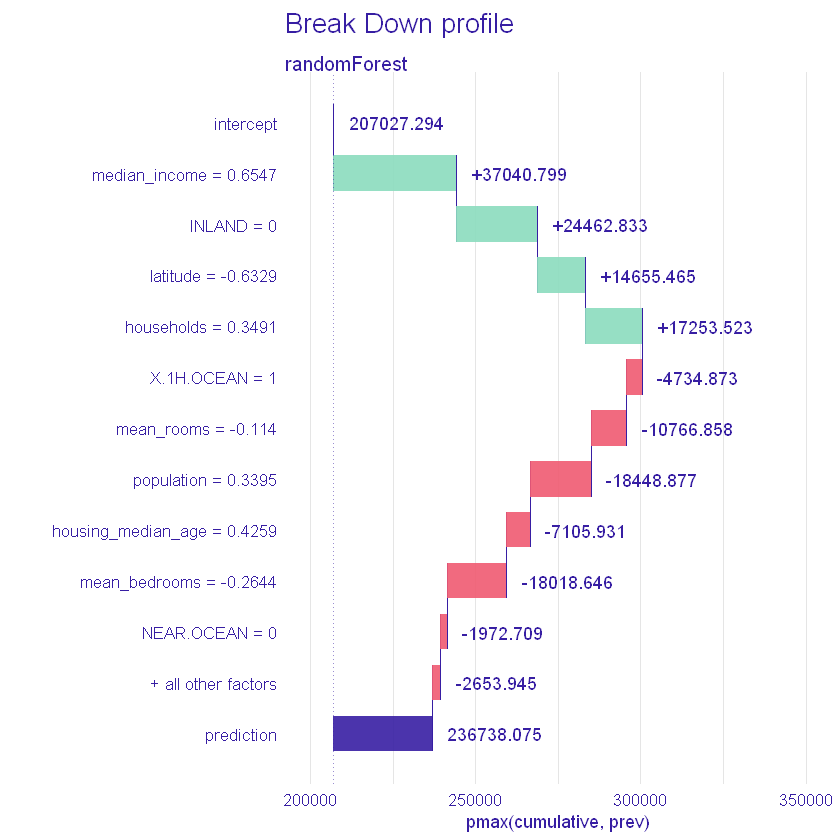

In [44]:
suppressMessages(plot(pp_ranger_bd_4)+ylim(200000,350000))

Powyższe obserwacje różnią się wpływem cechy longitude = 0.6285 ( dla pierwszej pozytywny, dla drugiej negatywny).

Aby odnieść się do analizy sprawdzę jak wyglądały oryginalne dane przed skalowaniem.

In [33]:
bb <- dplyr::count(h, longitude, sort = TRUE)
cc <- bb[1,"longitude"]
aa <- dplyr ::filter(h, longitude == cc)
aa[1,] #Division Creek Road, Inyo County, CA, United States of America

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
-118.31,36.94,35,2563,530,861,371,2.325,80600,INLAND


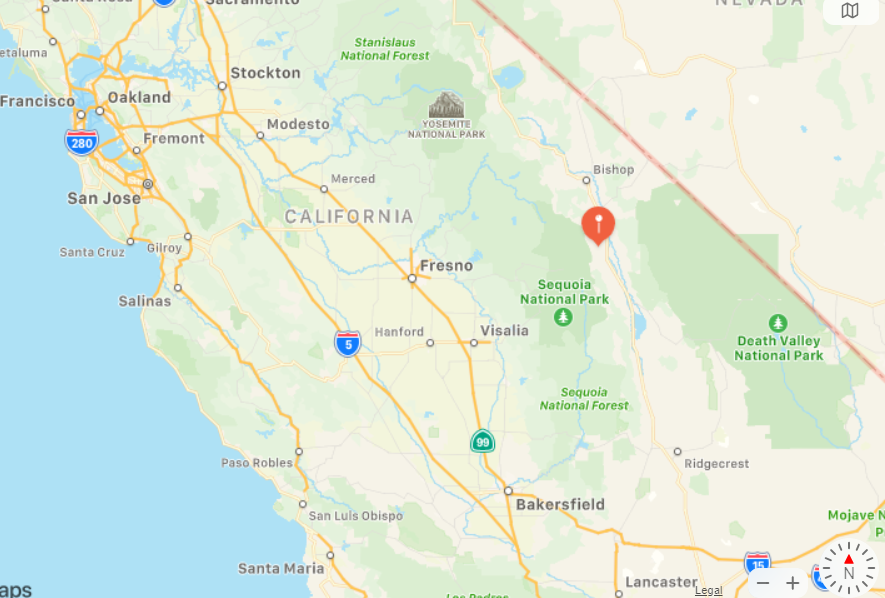

In [34]:
aa[3,] #LADWP, Big Tujunga Canyon Road, Sunland, CA 91040, United States of America


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3,-118.31,34.28,34,3258,610,1810,633,5.1145,219900,<1H OCEAN


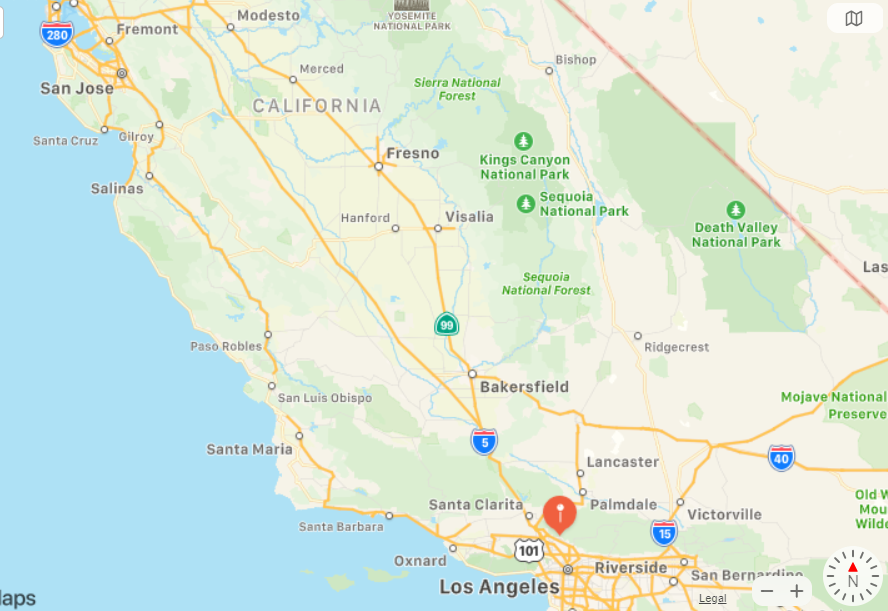

Różny wpływ tej samej długości geograficznej na podane dwie obserwacje możemy wytłumaczyć gdy przyjrzymy się umiejscowieniu tych obserwacji na mapie.

Dla pierwszej obserwacji patrząc na wszystkie inne cechy, długość geograficzna porównując ją z pozostałymi dodaje pozytywny wpływ na wynik. 

Dla drugiej obserwacji, na tej szerokości goeograficznej i z takimi wartościami pozostałych cech, dana długość goeograficzna ma mały ale negatywny wpływ. Np na tej szerokości geograficznej, "tuż obok" na trochę większej wartości długości geograficznej wyniki średniej ceny domów są wyższe.

Na wynik danej predykcji ma wpływ połączenie wszystkich cech.

In [45]:
suppressWarnings(library(ggplot2))

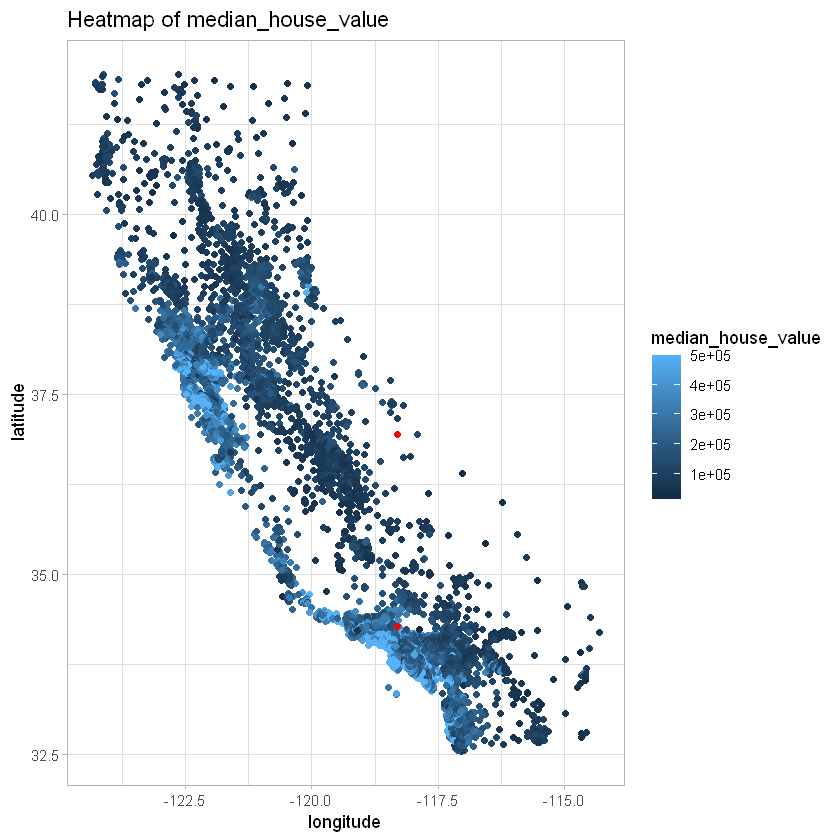

In [10]:
ggplot(h, aes(x=longitude, y=latitude, color=median_house_value))+
  geom_point()+
  geom_point(x = -118.31, y = 34.28,color = 'red')+
  geom_point(x = -118.31, y = 36.94,color = 'red')+
  ggtitle("Heatmap of median_house_value")+
  theme_light()